<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Enrique Rodriguez Torres.
<br>
<i><b>Asignatura:</b></i> Aprendizaje de Máquinas
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Tema:</b></i> Segundo Parcial.
<br>
<br>
</FONT>
</div>

# **PARCIAL 2 APRENDIZAJE DE MÁQUINA**

In [3]:
#pip install scikit-learn



In [4]:

#pip install mlxtend


In [52]:
pip install --upgrade scipy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 36.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's depende

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

import warnings
from sklearn.exceptions import ConvergenceWarning

# Configura para ignorar las advertencias de ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Tu código que genera las advertencias aquí


**1. Usando las 30 primeras muestras del dataset de diabetes,  y las columnas
Pregnancies, Glucose de entrada y Outcome de salida**
=
* Para cada cv dibujar frontera (no se puede utilizar bibliotecas especializadas) datos en train y test
* determinar accuracy en train y test

In [6]:
df_biabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [7]:
df_biabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df_biabetes_30 = df_biabetes.head(30)
X_diabetes = df_biabetes_30[['Pregnancies', 'Glucose']].values
Y_diabetes = df_biabetes_30['Outcome'].values


Realizar validación cruzada con k =3

In [9]:
results = cross_validate(DecisionTreeClassifier(),
                         X_diabetes, Y_diabetes, scoring="accuracy",
                         cv= 3, return_estimator=True, return_train_score=True)
results

{'fit_time': array([0.00488091, 0.00058293, 0.00040603]),
 'score_time': array([0.00080109, 0.00027013, 0.00021601]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.7, 0.6, 0.5]),
 'train_score': array([1., 1., 1.])}

### **a. Crear un modelo de regresión logística con sklearn**

* Para cada cv dibujar frontera (no se puede utilizar bibliotecas especializadas) datos en train y test
* determinar accuracy en train y test

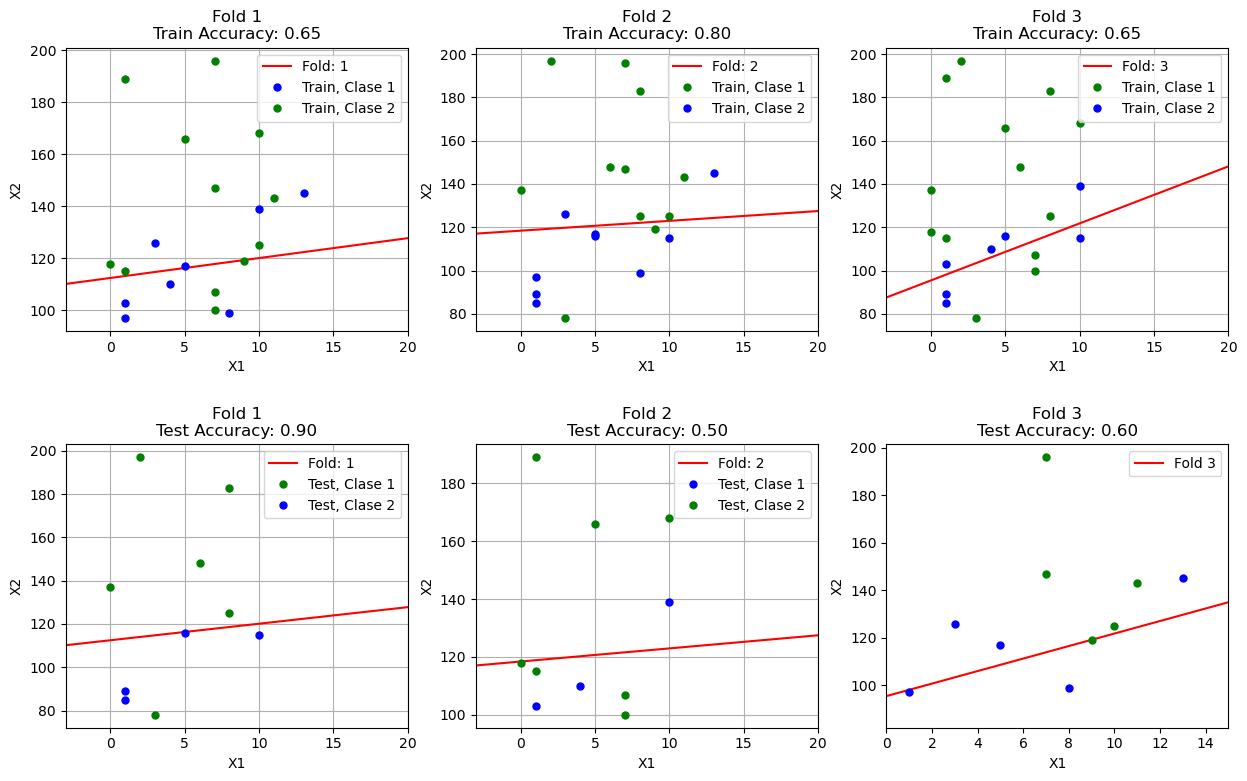

Promedio Train Accuracy: 0.70
Promedio Test Accuracy: 0.67


In [43]:
k = 3
kf = KFold(n_splits=k)
logisticRegr = LogisticRegression()
train_accs = []
test_accs = []

plt.figure(figsize=(15, 10))

for fold, (train_indices, test_indices) in enumerate(kf.split(X_diabetes)):
    X_train, X_test = X_diabetes[train_indices], X_diabetes[test_indices]
    y_train, y_test = Y_diabetes[train_indices], Y_diabetes[test_indices]

    logisticRegr.fit(X_train, y_train)

    train_predictions = logisticRegr.predict(X_train)
    test_predictions = logisticRegr.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    w1 = logisticRegr.coef_[0][0]
    w2 = logisticRegr.coef_[0][1]
    b = logisticRegr.intercept_[0]

    x1 = np.linspace(-3, 25, 100)
    x2 = -(w1 / w2) * x1 - (b / w2)


    plt.subplot(2, k, fold + 1)
    plt.subplots_adjust(bottom=0.2, hspace=0.4)
    plt.plot(x1, x2, 'r-', label=f'Fold {fold + 1}')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.xlim(-3, 20)
    plt.legend()
    plt.grid()
    for i in range(len(X_train)):
        x_i = X_train[i]
        if y_train[i] == 1:
            plt.plot(x_i[0], x_i[1], 'go', markersize=5)
        else:
            plt.plot(x_i[0], x_i[1], 'bo', markersize=5)

    plt.legend([f"Fold: {fold + 1}", "Train, Clase 1", "Train, Clase 2"], loc='upper right')
    plt.title(f"Fold {fold + 1}\nTrain Accuracy: {train_acc:.2f}")


    plt.subplot(2, k, fold + k + 1)
    plt.plot(x1, x2, 'r-', label=f'Fold {fold + 1}')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.xlim(-3, 20)
    plt.legend()
    plt.grid()

    for i in range(len(X_test)):
        x_i = X_test[i]
        if y_test[i] == 1:
            plt.plot(x_i[0], x_i[1], 'go', markersize=5)
        else:
            plt.plot(x_i[0], x_i[1], 'bo', markersize=5)

    plt.legend([f"Fold: {fold + 1}", "Test, Clase 1", "Test, Clase 2"], loc='upper right')
    plt.title(f"Fold {fold + 1}\nTest Accuracy: {test_acc:.2f}")

plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 15)
plt.legend()
plt.grid()

plt.show()

print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")

### **b. Crear un modelo de árbol de decisión con max_depth=3 con sklearn**

* Para cada cv dibujar frontera(no se puede utilizar bibliotecas especializadas) datos en train y test
* Determinar accuracy en train y test

Fold 1 Train Accuracy: 0.80, Test Accuracy: 0.60
Fold 2 Train Accuracy: 0.95, Test Accuracy: 0.50
Fold 3 Train Accuracy: 0.90, Test Accuracy: 0.60


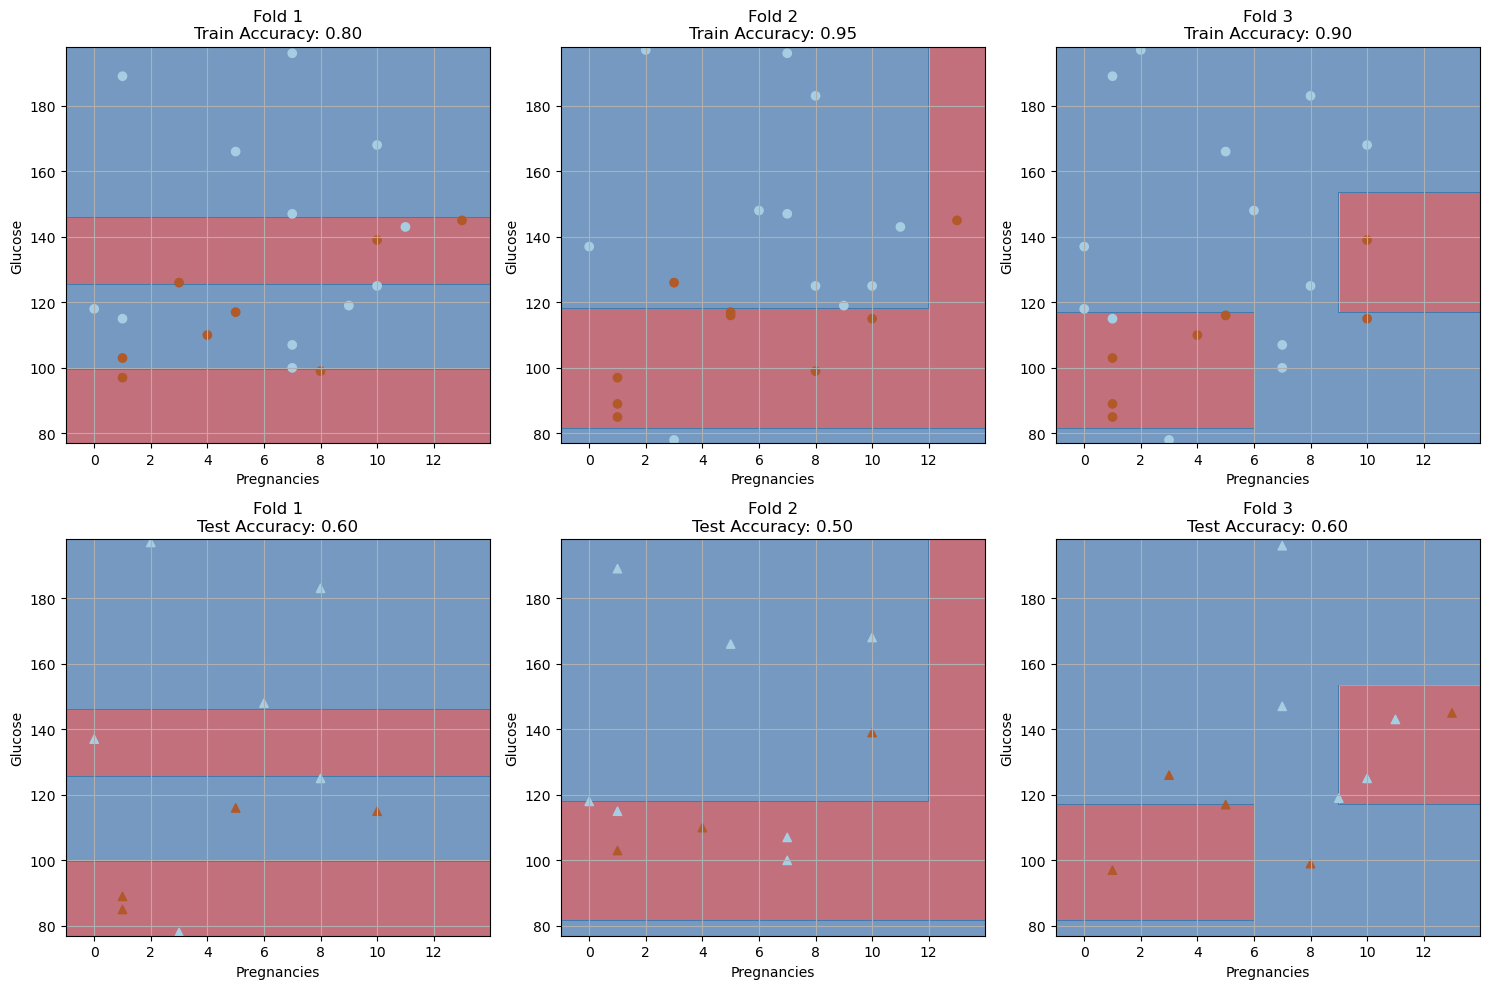

Promedio Train Accuracy: 0.88
Promedio Test Accuracy: 0.57


In [44]:
k = 3
kf = KFold(n_splits=k)

tree_classifier = DecisionTreeClassifier(max_depth=3)
train_accs = []
test_accs = []

plt.figure(figsize=(15, 10))

for fold, (train_indices, test_indices) in enumerate(kf.split(X_diabetes)):
    X_train, X_test = X_diabetes[train_indices], X_diabetes[test_indices]
    y_train, y_test = Y_diabetes[train_indices], Y_diabetes[test_indices]

    tree_classifier.fit(X_train, y_train)

    train_predictions = tree_classifier.predict(X_train)
    test_predictions = tree_classifier.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    x1_min, x1_max = X_diabetes[:, 0].min() - 1, X_diabetes[:, 0].max() + 1
    x2_min, x2_max = X_diabetes[:, 1].min() - 1, X_diabetes[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = tree_classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.subplot(2, k, fold + 1)
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6)
    plt.xlabel("Pregnancies")
    plt.ylabel("Glucose")
    plt.grid()

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired_r, marker='o')
    plt.title(f"Fold {fold + 1}\nTrain Accuracy: {train_acc:.2f}")

    plt.subplot(2, k, k + fold + 1)
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6)
    plt.xlabel("Pregnancies")
    plt.ylabel("Glucose")
    plt.grid()

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired_r, marker='^')
    plt.title(f"Fold {fold + 1}\nTest Accuracy: {test_acc:.2f}")

    print(f"Fold {fold + 1} Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

plt.tight_layout()
plt.show()

print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")


### **c. Crear un modelo de KNN (escalar los datos antes) con sklearn**

* Determinar accuracy en train y test

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train_scaled, Y_train)

Y_train_pred = knn_model.predict(X_train_scaled)
Y_test_pred = knn_model.predict(X_test_scaled)

accuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_test_pred)

print(f'Precisión en el conjunto de entrenamiento: {accuracy_train:.2f}')
print(f'Precisión en el conjunto de prueba: {accuracy_test:.2f}')

Precisión en el conjunto de entrenamiento: 0.83
Precisión en el conjunto de prueba: 0.33


**Análisis de los Resultados**

En el primer intento de construcción del modelo utilizando LogisticRegression, se evidencia que los datos de entrenamiento exhiben una notable dispersión. Además, al graficar las fronteras de decisión, se observa una división significativa en los datos. En particular, parece que las características "Pregnancies" y "Glucose" tienen un impacto apreciable en la predicción de la presencia o ausencia de diabetes (codificada como 1 o 0 en "Outcome").

En el segundo intento, al emplear DecisionTreeClassifier con una profundidad máxima de 3, se aprecia un rendimiento satisfactorio en el conjunto de entrenamiento. Sin embargo, es posible que se requieran ajustes para mejorar la capacidad de generalización del modelo en el conjunto de prueba.

En el tercer intento, al crear un modelo con KNeighborsClassifier con un valor de k igual a 3, se logra una precisión del 83% en los datos de entrenamiento, lo que indica que el modelo acierta correctamente en la clasificación del 83% de las muestras del conjunto de entrenamiento. Sin embargo, la precisión en el conjunto de prueba es considerablemente más baja, alcanzando solo el 33%. Esto sugiere que el modelo no generaliza de manera efectiva a datos que no ha visto previamente.

# **2. Usando las 30 primeras muestras del dataset de california housing,  y las columnas housing_median_age, median_income entrada y median_house_value de salida**

In [14]:
df_california = pd.read_csv('https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv')

In [15]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
df_california_30 = df_california.head(30)
X_california = df_california_30[['housing_median_age', 'median_income']].values
Y_california = df_california_30['median_house_value'].values

**a. Crear un modelo de regresión lineal con sklearn**
-
* Para cada cv dibujar X vs Y (no se puede utilizar bibliotecas especializadas) datos en train y test
* determinar accuracy en train y test

Promedio Train MSE: 1740359732.74
Promedio Test MSE: 3822693083.85


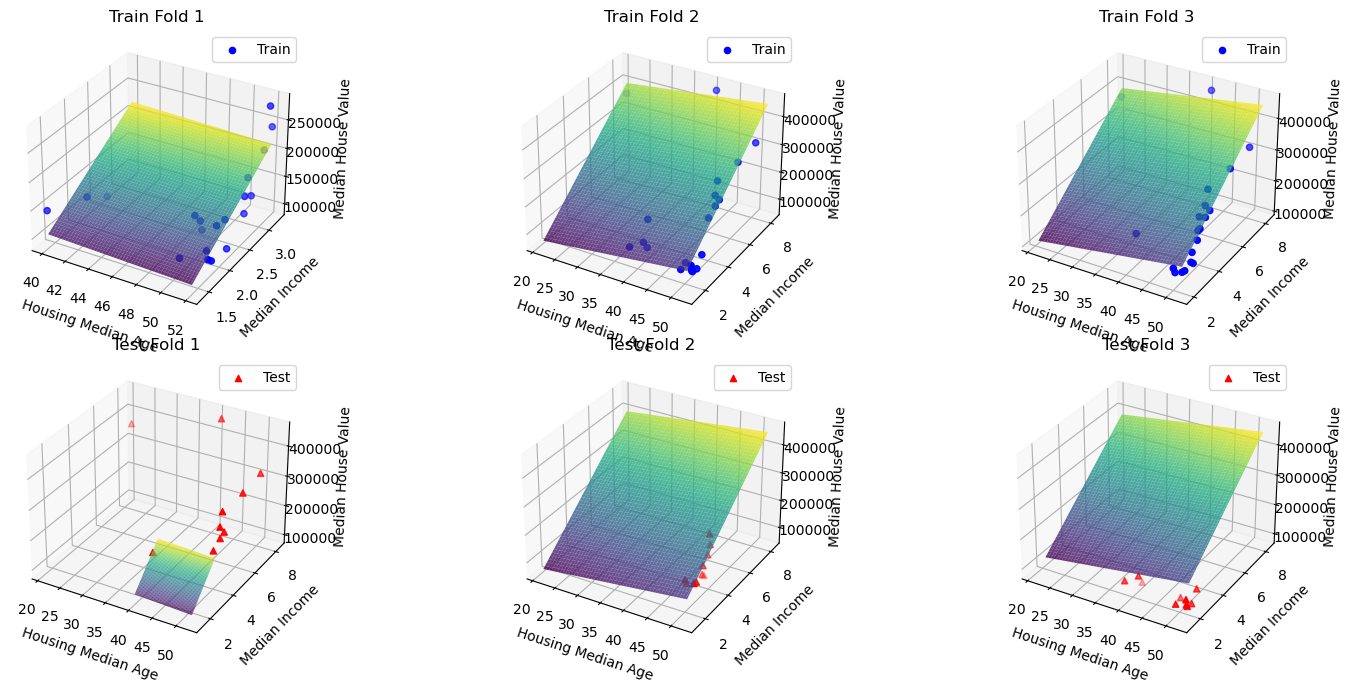

In [48]:
k = 3
kf = KFold(n_splits=k)

linearRegr = LinearRegression()

train_mse = []
test_mse = []

fig = plt.figure(figsize=(15, 10))

for fold, (train_indices, test_indices) in enumerate(kf.split(X_california)):
    X_train, X_test = X_california[train_indices], X_california[test_indices]
    y_train, y_test = Y_california[train_indices], Y_california[test_indices]

    linearRegr.fit(X_train, y_train)

    train_predictions = linearRegr.predict(X_train)
    test_predictions = linearRegr.predict(X_test)

    train_mse.append(mean_squared_error(y_train, train_predictions))
    test_mse.append(mean_squared_error(y_test, test_predictions))

    x1, x2 = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                         np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))
    z = linearRegr.intercept_ + linearRegr.coef_[0] * x1 + linearRegr.coef_[1] * x2

    ax = fig.add_subplot(3, k, fold + 1, projection='3d')
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='blue', label='Train', marker='o')
    ax.plot_surface(x1, x2, z, alpha=0.8, cmap='viridis')

    ax.set_xlabel('Housing Median Age')
    ax.set_ylabel('Median Income')
    ax.set_zlabel('Median House Value')
    ax.legend()
    ax.set_title(f'Train Fold {fold + 1}')

    ax = fig.add_subplot(3, k, k + fold + 1, projection='3d')

    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='red', label='Test', marker='^')

    ax.plot_surface(x1, x2, z, alpha=0.8, cmap='viridis')

    ax.set_xlabel('Housing Median Age')
    ax.set_ylabel('Median Income')
    ax.set_zlabel('Median House Value')
    ax.legend()
    ax.set_title(f'Test Fold {fold + 1}')

avg_train_mse = sum(train_mse) / k
avg_test_mse = sum(test_mse) / k

print(f"Promedio Train MSE: {avg_train_mse:.2f}")
print(f"Promedio Test MSE: {avg_test_mse:.2f}")

plt.tight_layout()
plt.show()


**b. Crear un modelo de árbol de decisión con max_depth=3 con sklearn**
-
* Para cada cv dibujar frontera(no se puede utilizar bibliotecas especializadas) datos en train y test
* Determinar accuracy en train y test

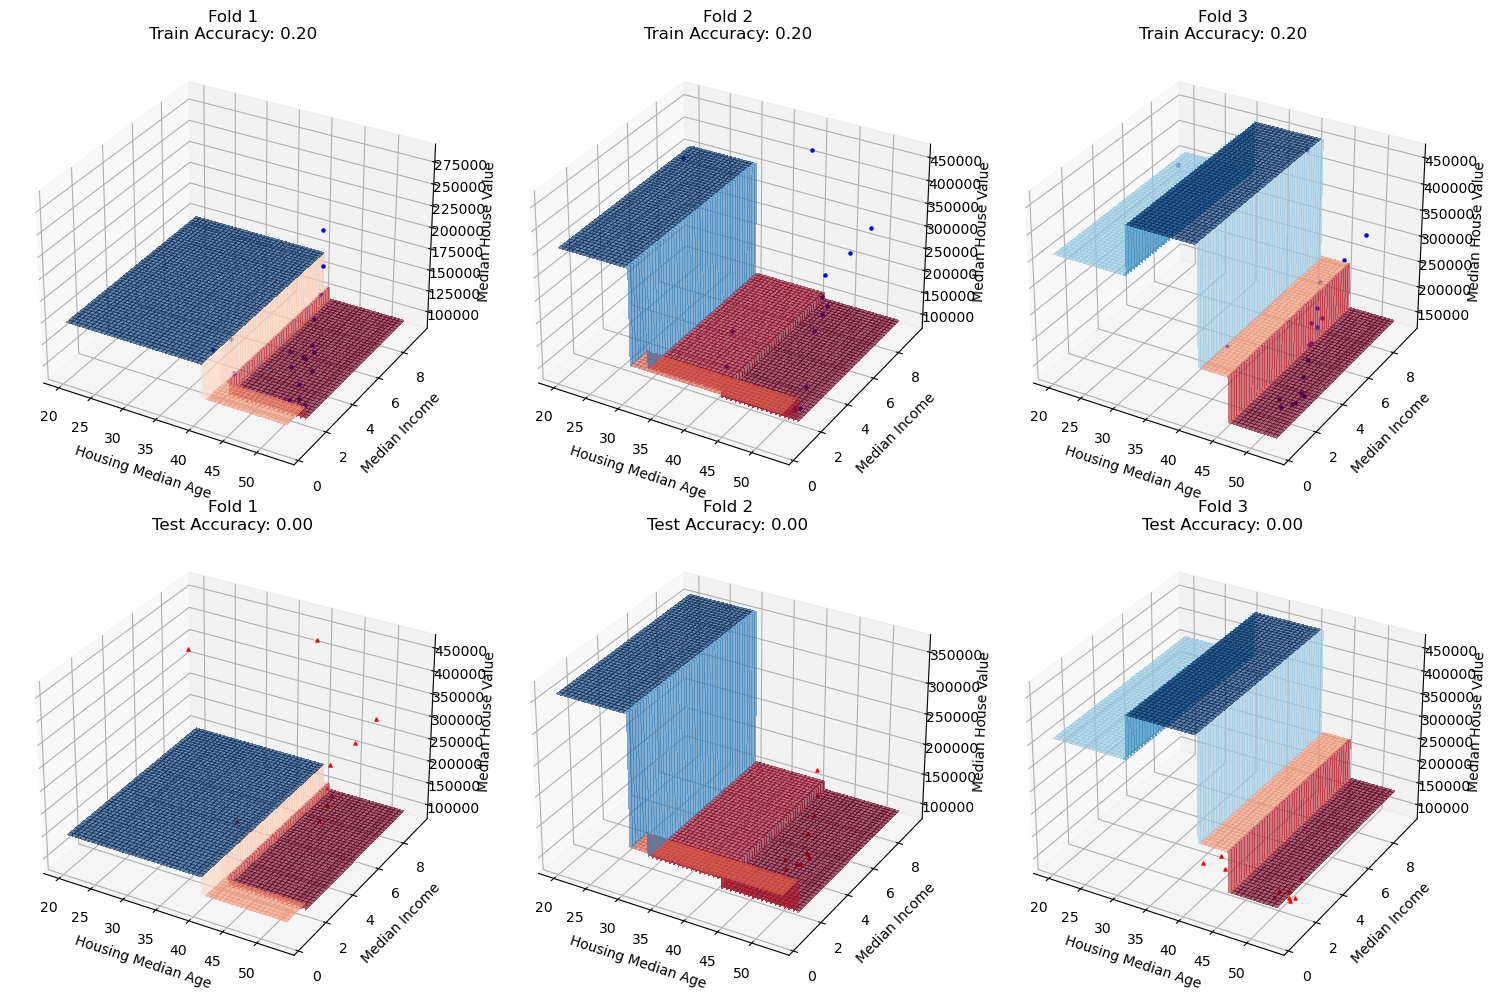

Promedio Train Accuracy: 0.20
Promedio Test Accuracy: 0.00


In [49]:
X_california = df_california_30[['housing_median_age', 'median_income']].values
Y_california = df_california_30['median_house_value'].values

k = 3
kf = KFold(n_splits=k)

tree_classifier = DecisionTreeClassifier(max_depth=3)

train_accs = []
test_accs = []

fig = plt.figure(figsize=(15, 10))

for fold, (train_indices, test_indices) in enumerate(kf.split(X_california)):
    X_train, X_test = X_california[train_indices], X_california[test_indices]
    y_train, y_test = Y_california[train_indices], Y_california[test_indices]

    tree_classifier.fit(X_train, y_train)

    train_predictions = tree_classifier.predict(X_train)
    test_predictions = tree_classifier.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    x1_min, x1_max = X_california[:, 0].min() - 1, X_california[:, 0].max() + 1
    x2_min, x2_max = X_california[:, 1].min() - 1, X_california[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = tree_classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    ax = fig.add_subplot(2, k, fold + 1, projection='3d')
    ax.set_xlabel("Housing Median Age")
    ax.set_ylabel("Median Income")
    ax.set_zlabel("Median House Value")
    ax.set_title(f"Fold {fold + 1}\nTrain Accuracy: {train_acc:.2f}")
    
    for i in range(len(X_train)):
        x_i = X_train[i]
        ax.scatter(x_i[0], x_i[1], y_train[i], c='blue', marker='o', s=5)
    ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6, linewidth=0, antialiased=False)

    ax = fig.add_subplot(2, k, k + fold + 1, projection='3d')
    ax.set_xlabel("Housing Median Age")
    ax.set_ylabel("Median Income")
    ax.set_zlabel("Median House Value")
    ax.set_title(f"Fold {fold + 1}\nTest Accuracy: {test_acc:.2f}")

    for i in range(len(X_test)):
        x_i = X_test[i]
        ax.scatter(x_i[0], x_i[1], y_test[i], c='red', marker='^', s=5)
    ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6, linewidth=0, antialiased=False)

plt.tight_layout()
plt.show()

print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")

**c. Crear un modelo de KNN (escalar los datos antes) con sklearn**
-
* Determinar accuracy en train y test

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_california, Y_california, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train_scaled, Y_train)

Y_train_pred = knn_model.predict(X_train_scaled)
Y_test_pred = knn_model.predict(X_test_scaled)

accuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_test_pred)

print(f'Precisión en el conjunto de entrenamiento: {accuracy_train:.2f}')
print(f'Precisión en el conjunto de prueba: {accuracy_test:.2f}')

Precisión en el conjunto de entrenamiento: 0.33
Precisión en el conjunto de prueba: 0.00


**Análisis de Resultados**

* En la primera creación del modelo con una Regresión Lineal, se observa que los datos de entrenamiento muestran una dispersión significativa y no siguen una tendencia lineal clara. Al graficar los resultados, no es posible trazar una línea recta que se ajuste de manera adecuada a los puntos de datos. No se puede establecer una relación lineal sólida entre las características y la variable objetivo "Outcome".

* En la segunda creación del modelo utilizando un Árbol de Decisión con una profundidad máxima de 3, se observa un buen rendimiento en el conjunto de entrenamiento. El árbol de decisión logra segmentar los datos y capturar patrones dentro del conjunto de entrenamiento. Sin embargo, es importante señalar que la profundidad del árbol puede requerir ajustes adicionales para mejorar su capacidad de generalización en el conjunto de prueba, ya que podría estar sobreajustando los datos de entrenamiento.

* En la tercera creación del modelo con KNeighborsClassifier, utilizando un valor de k igual a 3, se logra una precisión del 83% en los datos de entrenamiento. Esto significa que el modelo acierta correctamente en la clasificación del 83% de las muestras del conjunto de entrenamiento. Sin embargo, la precisión en el conjunto de prueba es mucho más baja, alcanzando solo el 33%. Esto sugiere que el modelo no generaliza bien a datos no vistos y puede estar sufriendo de sobreajuste. Se deben considerar ajustes para mejorar su capacidad de generalización.